## Project Calculations 

## Graphs

In [7]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.chrome.service import Service 
from webdriver_manager.chrome import ChromeDriverManager
import time 
import random

In [9]:
cpi_data = pd.read_csv("sales_report.1.csv", skiprows=1)
print(cpi_data)

    Year      Jan      Feb      Mar      Apr      May      Jun      Jul  \
0   2014  120.193  120.827  121.983  122.784  122.977  122.791  122.446   
1   2015  114.990  116.143  117.892  118.023  119.316  119.422  119.120   
2   2016  114.444  113.823  114.913  115.908  116.334  116.418  115.420   
3   2017  115.733  115.895  116.202  116.700  116.371  115.865  115.377   
4   2018  116.510  117.063  117.351  118.133  118.514  118.384  118.118   
5   2019  115.852  116.585  117.693  118.585  118.702  118.136  118.201   
6   2020  117.046  117.210  116.604  115.565  115.686  116.623  117.439   
7   2021  118.929  119.792  121.145  122.815  124.355  126.023  126.903   
8   2022  132.145  134.189  137.902  138.301  140.456  142.980  142.137   
9   2023  139.378  140.081  140.523  141.712  141.928  142.143  142.078   
10  2024  139.045  140.130  141.145  141.902  141.779  141.186  141.143   

        Aug      Sep      Oct      Nov      Dec  
0   121.914  121.991  121.149  119.325  117.213  

In [11]:
# Check for missing values
print(cpi_data.isnull().sum())

# Drop missing values if necessary
cpi_data = cpi_data.dropna()

# Check data types
print(cpi_data.dtypes)


Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     1
Dec     1
dtype: int64
Year      int64
Jan     float64
Feb     float64
Mar     float64
Apr     float64
May     float64
Jun     float64
Jul     float64
Aug     float64
Sep     float64
Oct     float64
Nov     float64
Dec     float64
dtype: object


In [13]:
# Calculate descriptive statistics
print(cpi_data.describe())


             Year         Jan         Feb         Mar         Apr         May  \
count    10.00000   10.000000   10.000000   10.000000   10.000000   10.000000   
mean   2018.50000  120.522000  121.160800  122.220800  122.852600  123.463900   
std       3.02765    8.391504    8.754567    9.226876    9.412399    9.756527   
min    2014.00000  114.444000  113.823000  114.913000  115.565000  115.686000   
25%    2016.25000  115.762750  116.253500  116.790750  117.030750  116.906750   
50%    2018.50000  116.778000  117.136500  117.792500  118.359000  119.009000   
75%    2020.75000  119.877000  120.568250  121.773500  122.807250  124.010500   
max    2023.00000  139.378000  140.081000  140.523000  141.712000  141.928000   

              Jun        Jul         Aug         Sep         Oct        Nov  \
count   10.000000   10.00000   10.000000   10.000000   10.000000   10.00000   
mean   123.878500  123.72390  123.684200  123.758700  123.808900  122.95470   
std     10.326797   10.26810   10

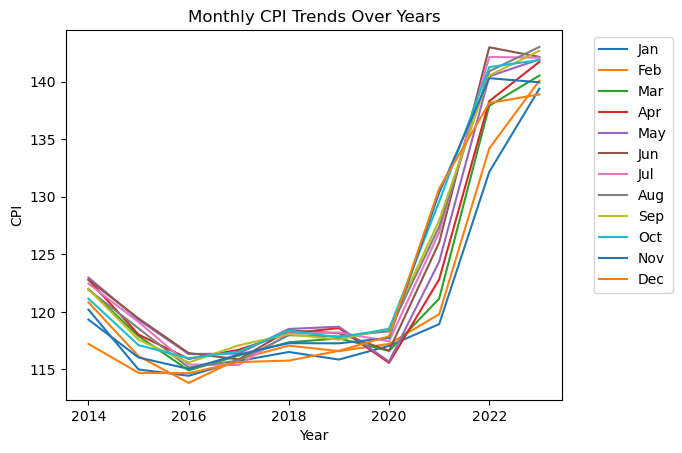

In [15]:
import matplotlib.pyplot as plt

# Plot monthly CPI trends
months = cpi_data.columns[1:]  # Exclude 'Year'
for month in months:
    plt.plot(cpi_data['Year'], cpi_data[month], label=month)

plt.title('Monthly CPI Trends Over Years')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


## How has the average CPI changed over the past decade? 

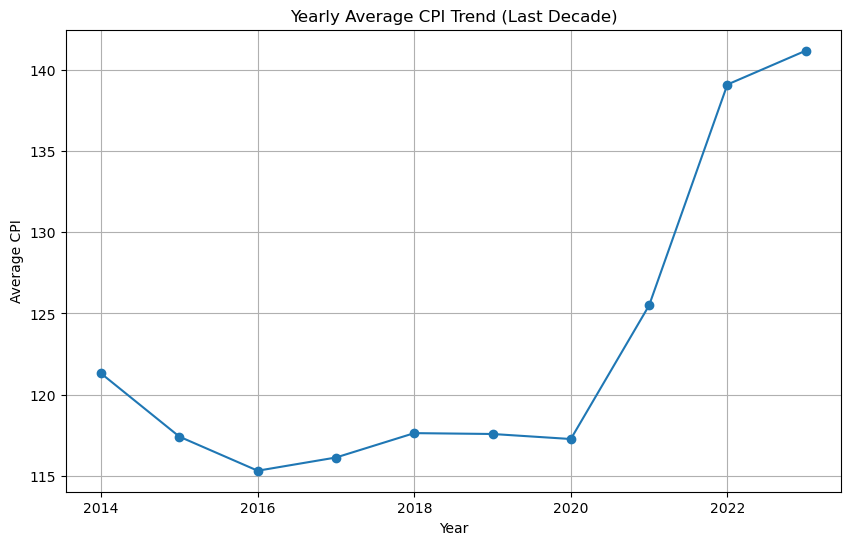

Year                int64
Jan               float64
Feb               float64
Mar               float64
Apr               float64
May               float64
Jun               float64
Jul               float64
Aug               float64
Sep               float64
Oct               float64
Nov               float64
Dec               float64
Yearly_Avg_CPI    float64
dtype: object


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway


# Step 2: Calculate Yearly Average CPI
cpi_data['Yearly_Avg_CPI'] = cpi_data.iloc[:, 1:].mean(axis=1)  # Average across months for each year
yearly_avg_cpi = cpi_data[['Year', 'Yearly_Avg_CPI']]

# Step 3: Plot Yearly Average CPI Trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_cpi['Year'], yearly_avg_cpi['Yearly_Avg_CPI'], marker='o')
plt.title('Yearly Average CPI Trend (Last Decade)')
plt.xlabel('Year')
plt.ylabel('Average CPI')
plt.grid(True)
plt.show()
print(cpi_data.dtypes)


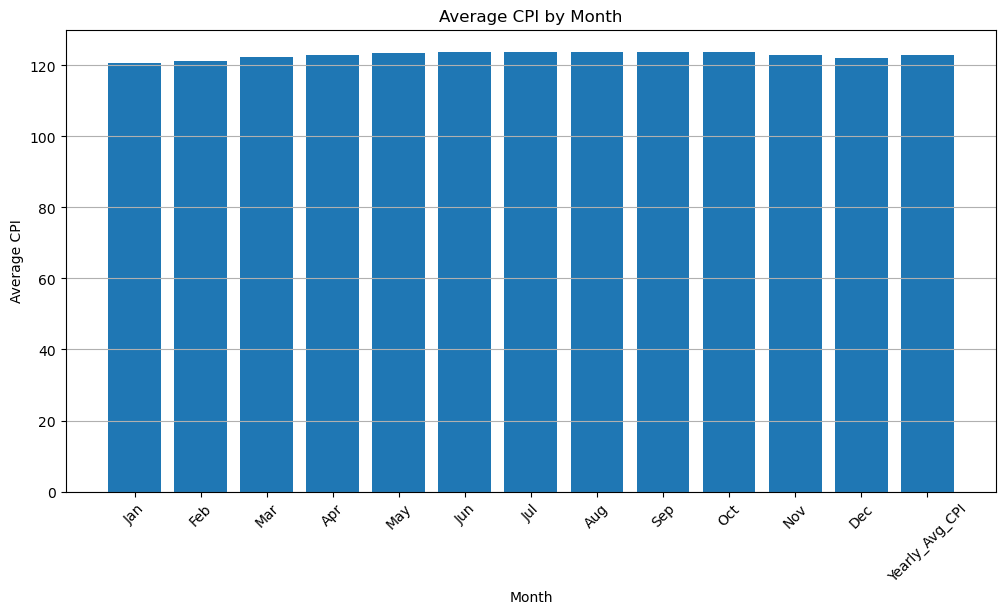

In [19]:
# Step 4: Analyze Seasonal Variations (Monthly Averages)
monthly_avg_cpi = cpi_data.iloc[:, 1:].mean(axis=0)  # Average CPI for each month
months = cpi_data.columns[1:]

plt.figure(figsize=(12, 6))
plt.bar(months, monthly_avg_cpi)
plt.title('Average CPI by Month')
plt.xlabel('Month')
plt.ylabel('Average CPI')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [21]:
# Step 5: Perform Hypothesis Testing for Seasonal Variations
# Prepare data for ANOVA
monthly_data = [cpi_data[month].dropna() for month in months]  # List of CPI values for each month
anova_result = f_oneway(*monthly_data)

# Display ANOVA result
if anova_result.pvalue < 0.05:
    print(f"There is a statistically significant difference in CPI between months (p-value = {anova_result.pvalue:.4f}).")
else:
    print(f"There is no statistically significant difference in CPI between months (p-value = {anova_result.pvalue:.4f}).")


There is no statistically significant difference in CPI between months (p-value = 0.9999).


In [6]:
cpi_data = cpi_data.groupby('month')['CPI'].mean().reset_index()

# Boxplot of CPI by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='CPI', data=df)
plt.title('Seasonal Variations in CPI Across Months')
plt.xlabel('Month')
plt.ylabel('CPI')
plt.show()

NameError: name 'cpi_data' is not defined

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Dataset
file_path = 'sales_report.1.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Step 2: Ensure DataFrame has the Correct Columns
# Convert year and month to proper types if needed
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['month'] = pd.Categorical(df['month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Drop rows with missing values
df = df.dropna(subset=['CPI', 'year', 'month'])

# Step 3: Analyze Seasonal Variations
# Group data by month to find average CPI across all years
monthly_cpi = df.groupby('month')['CPI'].mean().reset_index()

# Step 4: Visualize Monthly Variations
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='CPI', data=df)
plt.title('Seasonal Variations in CPI Across Months')
plt.xlabel('Month')
plt.ylabel('CPI')
plt.xticks(rotation=45)
plt.show()

# Step 5: Line Plot for Monthly Averages
plt.figure(figsize=(12, 6))
plt.plot(monthly_cpi['month'], monthly_cpi['CPI'], marker='o', linestyle='-', linewidth=2)
plt.title('Average Monthly CPI Over All Years')
plt.xlabel('Month')
plt.ylabel('Average CPI')
plt.grid()
plt.xticks(rotation=45)
plt.show()


KeyError: 'year'